**Recidivism**

Charles O'Bert and Cameron McLaren

https://charles-obert.github.io/Recidivism/Recidivism.html

**Project Goals**

It is well-known that the United States has one of the highest incarcerated populations in the world. One of these factors that contribute to this issue is recididivism. . The goal of this project is to understand the systemic factors that lead to increased recididivism rates:

1.   How does education level affect one's chances of reincarceration?
2.   How does employment level affect one's chances of reincarceration?
3.   What other factors contribute to recididivism rate?

Our hypothesis is that due to the way the prison system is structured, people with lower employment and education levels are more likely to face reincarceration given that more marginalized individuals are at higher risk for facing violence at the hands of the state.

**Collaboration Plan**

Our plan is to meet biweekly over Zoom in order to break down the deliverables for each milestone. We will go through each piece of the assignment and work on some pieces collaboratively and delegate other pieces accordingly. We plan to use Google Colab for the coding bits, and then we will import it into Jupyter Notebooks in order to submit it.

**Data Set Description:**

https://data.ojp.usdoj.gov/Courts/NIJ-s-recididivism-Challenge-Full-Dataset/ynf5-u8nk/about_data

Georgia gives documentation for individuals who have been reincarcerated and various pieces of information about them, including education level, race, gender, age, employment, and sentence lengths. It defines recidivism as relapsing into criminal behavior 3 or less years after release.

In [ ]:
# ETL: Extract Data
import pandas as pd
!git clone https://github.com/Charles-OBert/Recidivism.git
rec = pd.read_csv('Recidivism/Recidivism.csv') # read the 'csv' file
rec.head()

fatal: destination path 'Recidivism' already exists and is not an empty directory.


,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
#Overall tidying
rec.dropna(inplace=True) # gets rid of any entries with NaN in them
rec.set_index(['ID'], inplace=True) # sets ID as Index
rec.drop(rec.columns[49:], axis=1, inplace=True) #drop columns
#Map values into binary 1 and 0
rec['Gang_Affiliated']=rec['Gang_Affiliated'].map({True: 1, False: 0})
rec['Race']=rec['Race'].map({'BLACK': 1, 'WHITE': 0})
rec['Gender']=rec['Gender'].map({'M': 1, 'F': 0})
#Change value into string
rec['Residence_PUMA']=rec['Residence_PUMA'].astype(str)
rec.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,43-47,16,0,3.0,Standard,At least some college,3 or more,Drug,...,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,False,False
2,1,1,33-37,16,0,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,False,True
3,1,1,48 or older,24,0,7.0,High,At least some college,3 or more,Drug,...,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True
4,1,0,38-42,16,0,7.0,High,Less than HS diploma,1,Property,...,3 or more,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,False,False
5,1,0,33-37,16,0,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,...,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,False,True


Let's see what we have left.

In [ ]:
rec.dtypes

Gender                                                 int64
Race                                                   int64
Age_at_Release                                        object
Residence_PUMA                                        object
Gang_Affiliated                                        int64
Supervision_Risk_Score_First                         float64
Supervision_Level_First                               object
Education_Level                                       object
Dependents                                            object
Prison_Offense                                        object
Prison_Years                                          object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Drug                            object
Prior_Arrest_Episodes_PP

We got a lot of columns with bool values. Let's change them into int values to make analysis easier.

In [ ]:
for column in rec.columns:
  if rec[column].dtypes == bool:
    rec[column] = rec[column].astype(int)
rec['Residence_PUMA']=rec['Residence_PUMA'].astype(str)

Now the dtypes are much more accurate.

In [ ]:
rec.dtypes

Gender                                                 int64
Race                                                   int64
Age_at_Release                                        object
Residence_PUMA                                        object
Gang_Affiliated                                        int64
Supervision_Risk_Score_First                         float64
Supervision_Level_First                               object
Education_Level                                       object
Dependents                                            object
Prison_Offense                                        object
Prison_Years                                          object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Drug                            object
Prior_Arrest_Episodes_PP

**Exploratory Data Analysis**

There are a lot of variables within this dataset. Let's see their distribution between recididivists and non-recididivists.

**Education**

Here's the distribution of values for education.

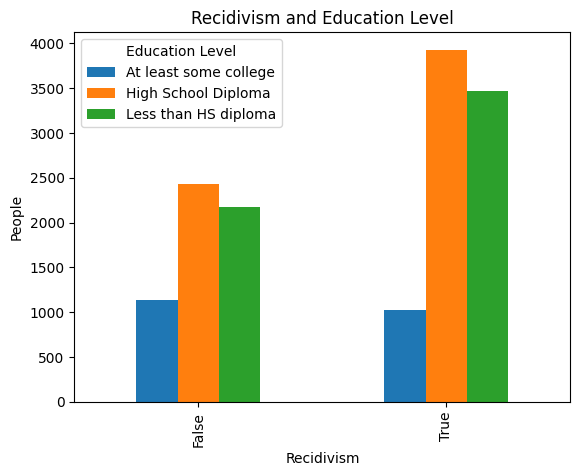

In [ ]:
import matplotlib.pyplot as plt
Edu_dist = rec.groupby('Recidivism_Within_3years')['Education_Level'].value_counts().unstack()
Edu_dist.plot.bar()
plt.title('Recidivism and Education Level')
plt.xlabel('Recidivism')
plt.ylabel('People')
plt.xticks([0, 1], ['False', 'True'])
plt.legend(title='Education Level')
plt.show()

**Employment**

Let's take a look at distribution of values for the time in days of being employed after parole (%).

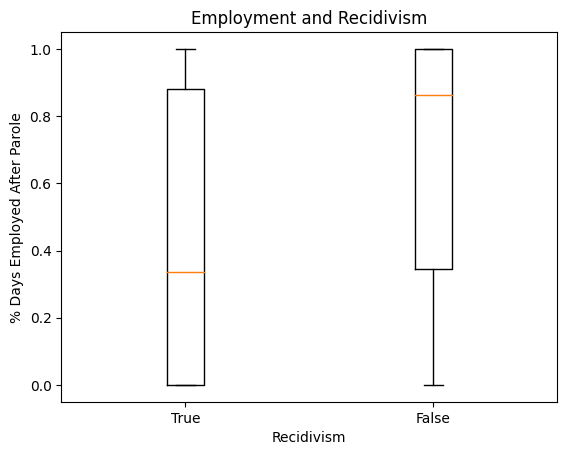

In [ ]:
#Divide data into two parts
true_values = rec[rec['Recidivism_Within_3years']==1]
false_values = rec[rec['Recidivism_Within_3years']==0]
# Plotting box plot
plt.boxplot([true_values['Percent_Days_Employed'], false_values['Percent_Days_Employed']], labels=['True', 'False'])
plt.xlabel('Recidivism')
plt.ylabel('% Days Employed After Parole')
plt.title('Employment and Recidivism')
plt.show()

**Criminal Offense**

Let's take a look at what people were reincarcerated for.

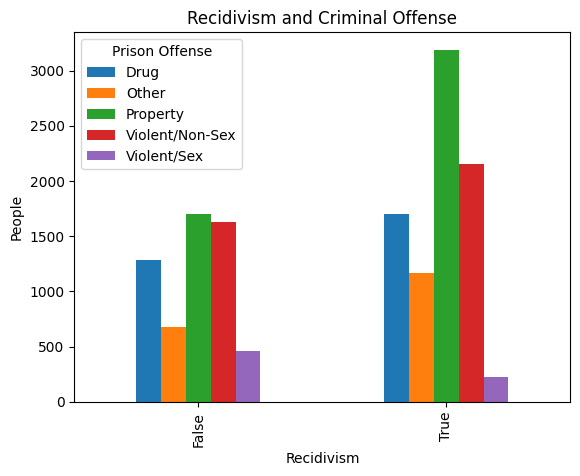

In [ ]:
Crime_dist = rec.groupby('Recidivism_Within_3years')['Prison_Offense'].value_counts().unstack()
Crime_dist.plot.bar()
plt.title('Recidivism and Criminal Offense')
plt.xlabel('Recidivism')
plt.ylabel('People')
plt.xticks([0, 1], ['False', 'True'])
plt.legend(title='Prison Offense')
plt.show()

**Residence Change**

This graph shows changes in residence for both recidivists and non-recidivists.

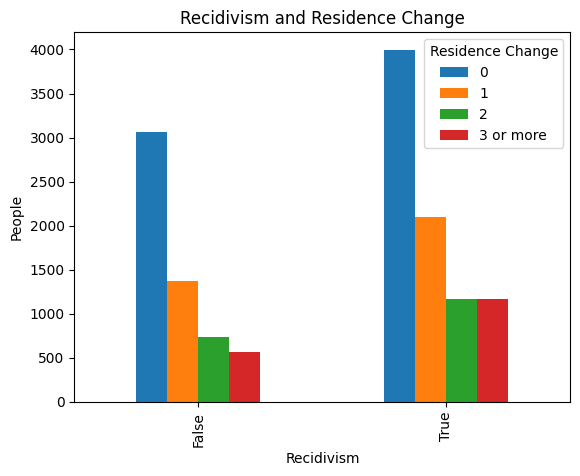

In [ ]:
res_change = rec.groupby('Recidivism_Within_3years')['Residence_Changes'].value_counts().unstack()
res_change.plot.bar()
plt.title('Recidivism and Residence Change')
plt.xlabel('Recidivism')
plt.ylabel('People')
plt.xticks([0, 1], ['False', 'True'])
plt.legend(title='Residence Change')
plt.show()

**Age**

This is a distribution that shows what age were prisoners released.

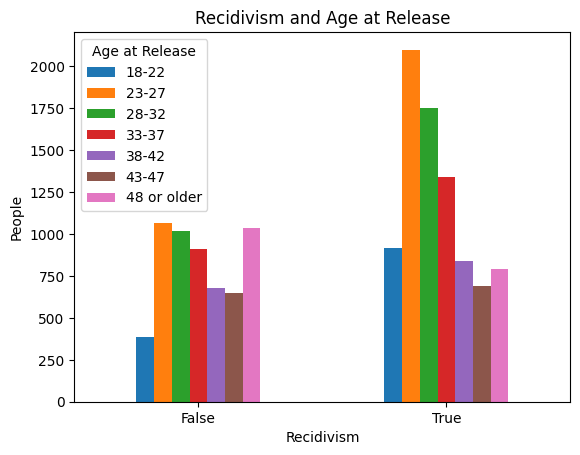

In [ ]:
Age_dist = rec.groupby('Recidivism_Within_3years')['Age_at_Release'].value_counts().unstack(fill_value=0)
Age_dist.plot(kind='bar', stacked=False)
plt.title('Recidivism and Age at Release')
plt.xlabel('Recidivism')
plt.ylabel('People')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.legend(title='Age at Release')
plt.show()

**Machine Learning Model**

We'll be using a logistic regression binary classifier. The independent variables will be the features of the individual and the dependent variable will be whether or not the individual is a recididivist.


In [ ]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define independent and dependent variables
X = rec.drop('Recidivism_Within_3years', axis=1)
y = rec['Recidivism_Within_3years']

# Define categorical and numerical features
cat_features = X.select_dtypes(include=object).columns
num_features = X.select_dtypes(exclude=object).columns

# Transform Data
transform = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features),('cat', OneHotEncoder(), cat_features)])

# Define the logistic regression model
model = Pipeline(steps=[('preprocessor', transform),
                        ('classifier', LogisticRegression())])

# Split the data into training and testing sets (validation set is 30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

To measure accuracy, we will use sklearn.metrics to give us the confusion matrix, accuarcy score and classification report.

Accuracy of model: 73.30039990590448 %
Classification report: 
               precision    recall  f1-score   support

          No       0.70      0.60      0.65      1733
         Yes       0.75      0.83      0.79      2518

    accuracy                           0.73      4251
   macro avg       0.73      0.71      0.72      4251
weighted avg       0.73      0.73      0.73      4251



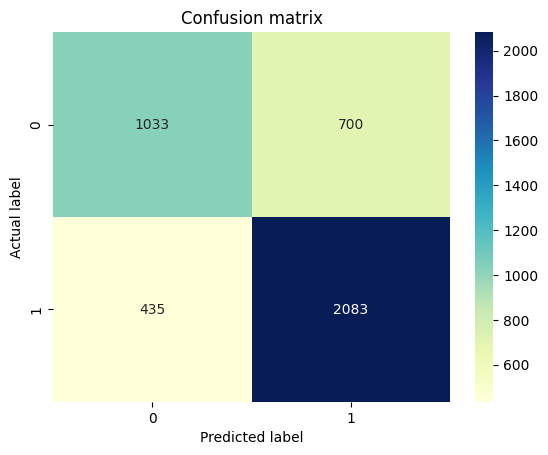

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#Seaborn visualization
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model:',accuracy_score(y_test,y_pred) * 100,'%')

# classification report
target_names = ['No', 'Yes']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))

**Further Resources and Conclusion**

The main feature that affected the model's performance was employment, which decreased its accuracy by 4%. Interestingly, demographic factors like gender, race, and age are not as strong predictors, with only 1% of decrease in accuracy.
This conclusion may change with the presence of more datasets.

Overall, we think recidivism is an overlooked issue and we think that more research is needed to tackle this problem effectively. If you are interested in taking a deeper dive, here are some sources to look at:

*   [DIJ's Prison Reform](https://www.justice.gov/archives/prison-reform) - Provides a list of reforms that can reduce recidivism
*   [Second Chance Act](https://csgjusticecenter.org/publications/50-states-1-goal/)- Lists the impacts on the state level of the Second Chance Act on Recidivism
*   [B.J.S. Recidivism Report](https://bjs.ojp.gov/library/publications/recidivism-prisoners-released-34-states-2012-5-year-follow-period-2012-2017#0-0) - A 5 year study that studies recidivism of prisoners in 34 states.